In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
delta_t=0.01
x_0=2
M=int(1e4)
N=1500 #we need M simulations up to time 10
simulations=np.zeros((N,M)) #each column contains one simulation
simulations[0,:]=x_0

In [3]:
#simulating:
for m in range(M):
    for n in range(1,N):
        simulations[n,m]=simulations[n-1,m]-simulations[n-1,m]*delta_t+np.sqrt(2*delta_t)*np.random.normal(0,1)

In [4]:
X_05=simulations[int(0.5/delta_t)]
X_1=simulations[int(1/delta_t)]
X_10=simulations[int(10/delta_t)]
X_0=simulations[0]


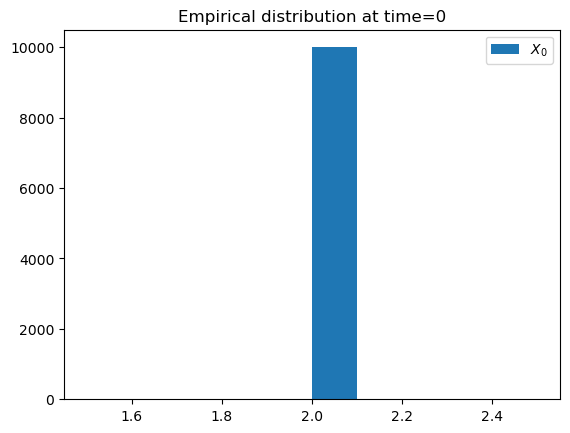

In [5]:
plt.hist(X_0, label="$X_0$");
plt.title("Empirical distribution at time=0");
plt.legend(loc='best')

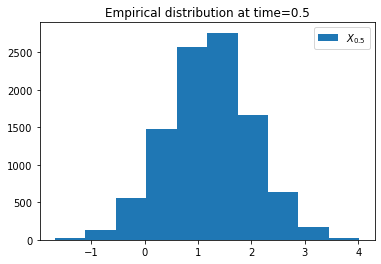

In [23]:
plt.hist(X_05, label="$X_{0.5}$");
plt.title("Empirical distribution at time=0.5");
plt.legend(loc='best')

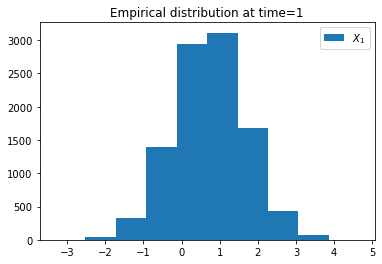

In [17]:
plt.hist(X_1, label="$X_1$");
plt.title("Empirical distribution at time=1");
plt.legend(loc='best')

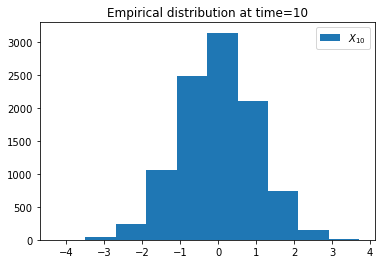

In [22]:
plt.hist(X_10, label="$X_{10}$");
plt.title("Empirical distribution at time=10");
plt.legend(loc='best')

We see that the distributions, except for time=0, where $X_0=x_0$ a.s, at time $t\in\{0.5,1,10\}$, given $X_0=x_0$, are all normal and they seem to converge to a standard normal distribution. This makes sense since $X_t$ has mean $x_0(1-\Delta_t)^{\frac{t}{\Delta_t}}$ that if $t\to\infty$ goes to  and it's normally distributed since the sum of independent normals ($X_{t-1}$,$\xi_t$) is still a normal variable.

4)
We can go reverse in time starting from a known and therefore simpler distribution to get the complicated and unknown distribution at time 0

In [9]:
#We start from time T=50
delta_t=0.01
M=int(1e4)
N=10000 #we need M simulations up to time 50
simulations=np.zeros((N,M)) #each column contains one simulation
simulations[N-1,:]=np.random.normal(0,1,M)

In [10]:
#simulating:
for m in range(M):
    for n in reversed(range(N-1)):
        simulations[n,m]=simulations[n+1,m]/(1-delta_t)-np.sqrt(2*delta_t)*np.random.normal(0,1)

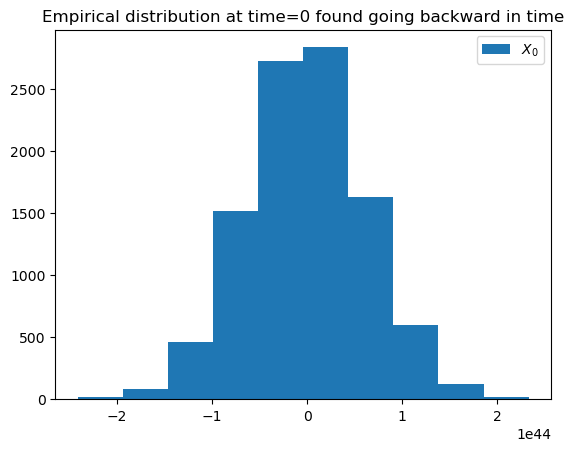

In [11]:
plt.hist(simulations[0], label="$X_0$");
plt.title("Empirical distribution at time=0 found going backward in time");
plt.legend(loc='best')

# Exercise 2

1) $\pi$ is symmetric w.r.t 4 and tends to 0 if $x\to +-\infty$, therefore we plot it in $[4-5,4+5]$.

In [12]:
def V(x):
    return ((x-4)**2-2)**2

In [13]:
def gV(x):
    return 4*((x-4)**2-2)*(x-4)

Text(0.5, 0, 'x')

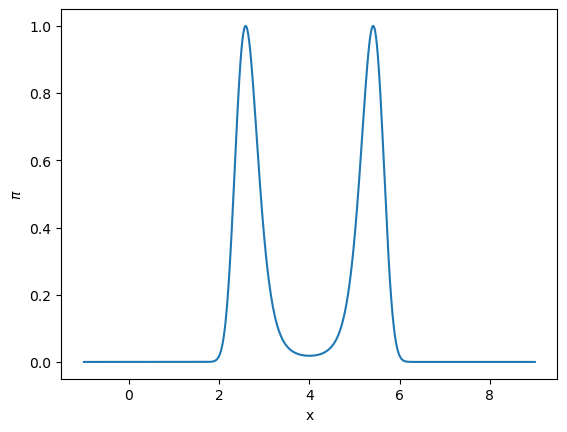

In [14]:
x=np.linspace(-1,9,1000)
plt.plot(x,np.exp(-V(x)));
plt.ylabel("$\pi$")
plt.xlabel("x")

$\frac{X_{t+\Delta t}-X_t}{\Delta_t}\approx \frac{dX_t}{dt}=-\nabla V(X_t)+\sqrt{2}(B_{\Delta_t+t}-B_t)/\Delta t$, then the Euler-? method in this case is: <br>
$x_{n+1}=-\nabla V(x_n)\Delta t + \sqrt{2 \Delta t}\xi_n$, where $\xi_n\sim N(0,1)$.

In [15]:
delta_t=0.01
x_0=1
M=int(1e4)
N=int(100/delta_t)+1 #we need M simulations up to time 10
simulations2=np.zeros((N,M)) #each column contains one simulation
simulations2[0,:]=x_0
#simulating:
for m in range(M):
    for n in range(1,N):
        simulations2[n,m]=simulations2[n-1,m]-gV(simulations2[n-1,m])*delta_t+np.sqrt(2*delta_t)*np.random.normal(0,1)

In order to have $\pi(x)$ as a density we must choose the constant $C$ such that the integral of $\pi(x)$ over $\mathbb{R}$ is 1 

In [16]:
import scipy.integrate as integrate
C = integrate.quad(lambda x: np.exp(-V(x)), -np.Inf, +np.Inf)

c:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Density')

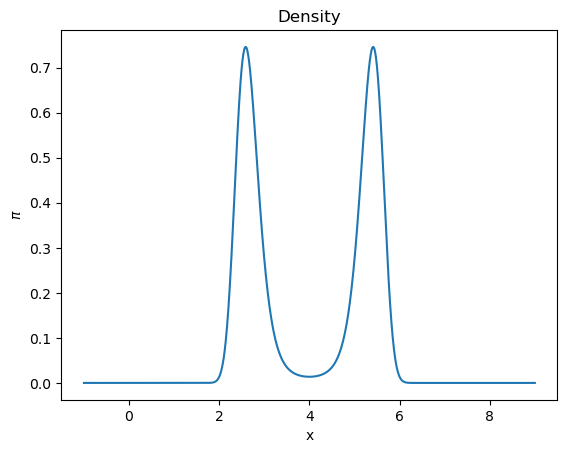

In [17]:
x=np.linspace(-1,9,1000)
plt.plot(x,(1/C[0])*np.exp(-V(x)));
plt.ylabel("$\pi$")
plt.xlabel("x")
plt.title("Density")

Histogram of simulated samples for time T=1,T=100:

Text(0.5, 1.0, 'Distribution of $X_T$ for T=100')

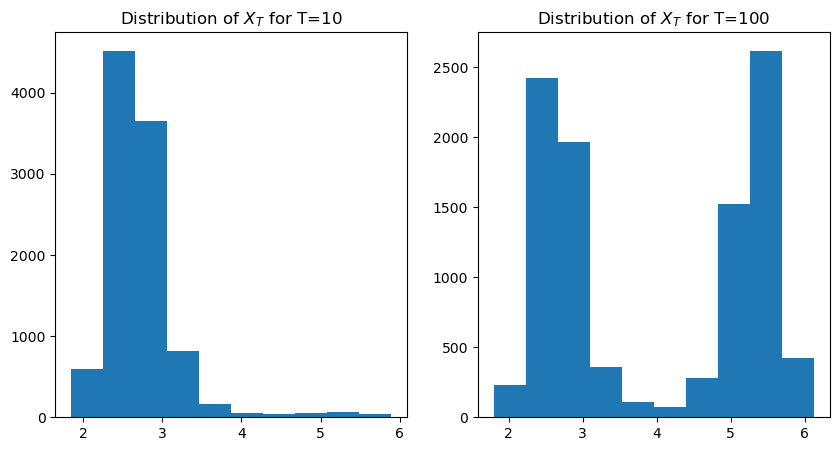

In [18]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].hist(simulations2[int(1/delta_t)]);
ax[0].set_title("Distribution of $X_T$ for T=10")
ax[1].hist(simulations2[-1]);
ax[1].set_title("Distribution of $X_T$ for T=100")

It seems that the process converges to random variable with density $\pi(x)$.

I expect the amount of animals of size >6 close to 0.

In [20]:
p6_1=np.sum(simulations2[int(1/delta_t)]>6)/len(simulations2[int(1/delta_t)])
p6_100=np.sum(simulations2[-1]>6)/len(simulations2[-1])
p6_1*100,p6_100*100

(0.0, 0.11)